# **Just playing around with monai tutorials :)**

## cloning the monai tutorials and installing monai


In [35]:
!git clone https://github.com/Project-MONAI/tutorials.git
!pip install monai

Cloning into 'tutorials'...
remote: Enumerating objects: 5786, done.
remote: Counting objects: 100% (264/264), done.
remote: Compressing objects: 100% (207/207), done.
remote: Total 5786 (delta 42), reused 259 (delta 40), pack-reused 5522
Receiving objects: 100% (5786/5786), 236.16 MiB | 21.46 MiB/s, done.
Resolving deltas: 100% (3349/3349), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing os and going to the 2d segmentation tutorial

In [38]:
import os
os.chdir('tutorials/2d_segmentation/torch')

In [39]:
!cat unet_training_array.py

# Copyright (c) MONAI Consortium
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#     http://www.apache.org/licenses/LICENSE-2.0
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import logging
import os
import sys
import tempfile
from glob import glob

import torch
from PIL import Image
from torch.utils.tensorboard import SummaryWriter

import monai
from monai.data import ArrayDataset, create_test_image_2d, decollate_batch, DataLoader
from monai.inferers import sliding_window_inference
from monai.metrics import DiceMetric
from monai.transforms import (
    Activations,
    AsDiscrete,
    Compose,

We can run the 2D segmentation scripts 

In [40]:
!python unet_training_array.py


MONAI version: 1.1.0
Numpy version: 1.21.6
Pytorch version: 1.13.1+cu116
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: a2ec3752f54bfc3b40e7952234fbeb5452ed63e3
MONAI __file__: /usr/local/lib/python3.8/dist-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 3.0.2
scikit-image version: 0.18.3
Pillow version: 7.1.2
Tensorboard version: 2.9.1
gdown version: 4.4.0
TorchVision version: 0.14.1+cu116
tqdm version: 4.64.1
lmdb version: 0.99
psutil version: 5.4.8
pandas version: 1.3.5
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies

generating synthetic data to /t

In [41]:
!python unet_evaluation_array.py

MONAI version: 1.1.0
Numpy version: 1.21.6
Pytorch version: 1.13.1+cu116
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: a2ec3752f54bfc3b40e7952234fbeb5452ed63e3
MONAI __file__: /usr/local/lib/python3.8/dist-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 3.0.2
scikit-image version: 0.18.3
Pillow version: 7.1.2
Tensorboard version: 2.9.1
gdown version: 4.4.0
TorchVision version: 0.14.1+cu116
tqdm version: 4.64.1
lmdb version: 0.99
psutil version: 5.4.8
pandas version: 1.3.5
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies

generating synthetic data to /t

In [14]:
import matplotlib.pyplot as plt


Monai has a cool function for creating synthetic segmentation data.
It produces an image, and it's respective segmentation mask:

In [76]:
from monai.data import ArrayDataset, create_test_image_2d, decollate_batch, DataLoader
image,mask= create_test_image_2d(1024,1024, num_seg_classes=1)

The image


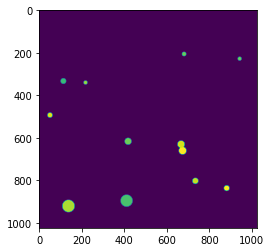

In [77]:
plt.imshow(image)
print("The image")

it's segmentation mask


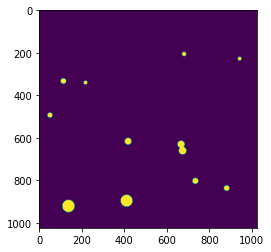

In [78]:
plt.imshow(mask)
print("it's segmentation mask")

In [49]:
os.listdir('output/img1/img1_seg.png')

['img1_seg.png']

In [52]:
from PIL import Image
image = Image.open("output/img1/img1_seg.png")
image.show()

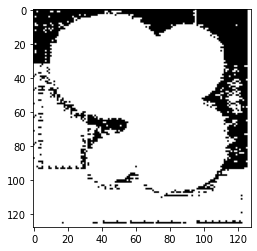

In [75]:
import imageio

im = imageio.imread('output/img0/img0_seg.png')
plt.imshow(im,cmap='gray')

* let's try to run the tutorial script with SwinUNETR instead of monai.networks.nets.UNet

* and then let's try with images of size 1024x1024 with create_test_image_2d images
* then we can try to use our dataset :)